In [11]:
%run data_acquisition.ipynb

## Correlación de variables

Se procede a realizar una matriz de correlación para poder determinar si existe o no una relación entre las diferentes variables

Para evitar confusion en los datos, se hace la matriz de correlacion pero con los valores absoltuos. De esta forma, todos los coeficientes seran positivos.

Podemos observar que la matriz de correlacion solo se calcula sobre valores numericos. Los valores categoricos fueron quitados de los datos de forma automatica.

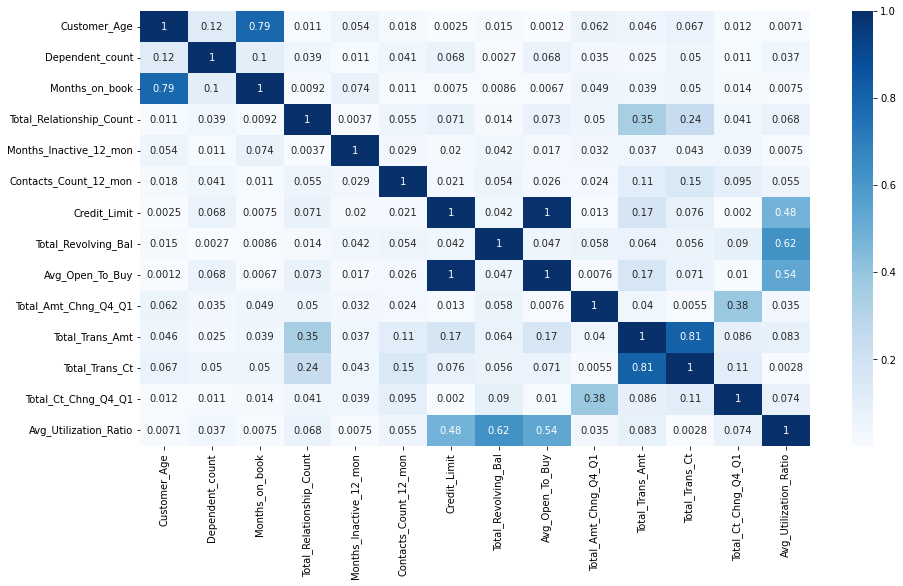

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(data=bank_df.corr(method='pearson').abs(),
            annot = True,
            cmap='Blues')
plt.show()

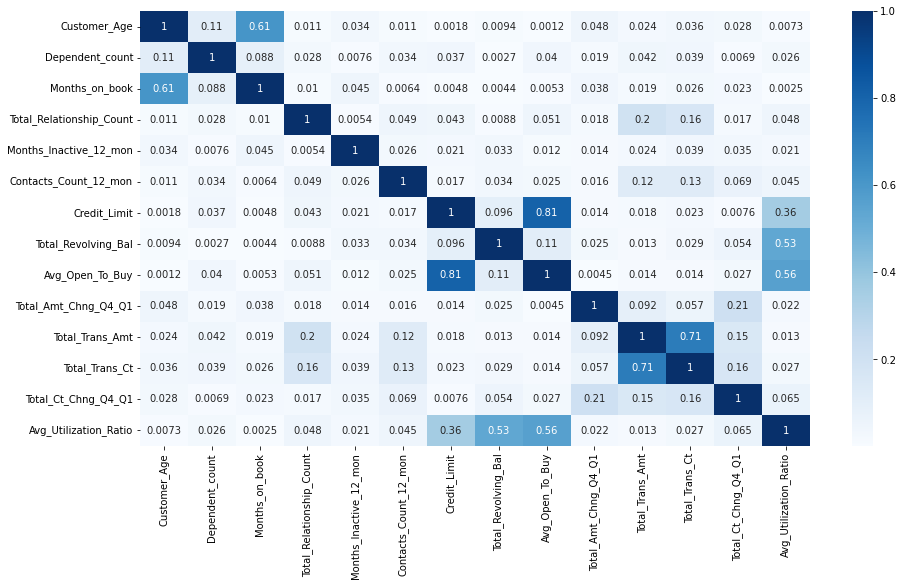

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(data=bank_df.corr(method='kendall').abs(),
            annot = True,
            cmap='Blues')
plt.show()

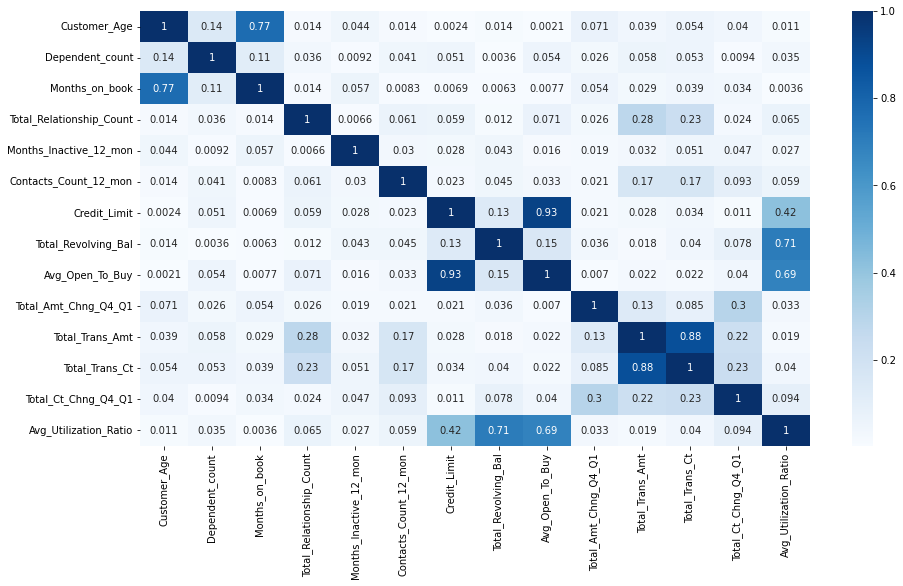

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(data=bank_df.corr(method='spearman').abs(),
            annot = True,
            cmap='Blues')
plt.show()

En los datos tenemos valores categoricos o del tipo "object" por lo que no podremos sacar mayores conclusiones sin antes quitarlos.

In [12]:
df = bank_df.drop(columns=['Card_Category','Marital_Status','Income_Category','Education_Level','Gender','Attrition_Flag'])   
# Aqui quitamos todas las columnas categoricas

In [21]:
df2 =correlaciones(df,10,'pearson')
df2.head()

Credit_Limit         Avg_Open_To_Buy          0.995981
Total_Trans_Amt      Total_Trans_Ct           0.807192
Customer_Age         Months_on_book           0.788912
Total_Revolving_Bal  Avg_Utilization_Ratio    0.624022
Avg_Open_To_Buy      Avg_Utilization_Ratio    0.538808
dtype: float64

In [22]:
df3 =correlaciones(df,10,'kendall')
df3.head()

Credit_Limit         Avg_Open_To_Buy          0.805012
Total_Trans_Amt      Total_Trans_Ct           0.707857
Customer_Age         Months_on_book           0.613382
Avg_Open_To_Buy      Avg_Utilization_Ratio    0.561205
Total_Revolving_Bal  Avg_Utilization_Ratio    0.533326
dtype: float64

In [23]:
df4 =correlaciones(df,10,'spearman')
df4.head()

Credit_Limit         Avg_Open_To_Buy          0.931431
Total_Trans_Amt      Total_Trans_Ct           0.879725
Customer_Age         Months_on_book           0.768901
Total_Revolving_Bal  Avg_Utilization_Ratio    0.708607
Avg_Open_To_Buy      Avg_Utilization_Ratio    0.685716
dtype: float64

Se hizo un analisis de correlacion segun los 3 tipos de coeficientes y el top5 de variables con mayor correlacion sigue siendo el mismo 

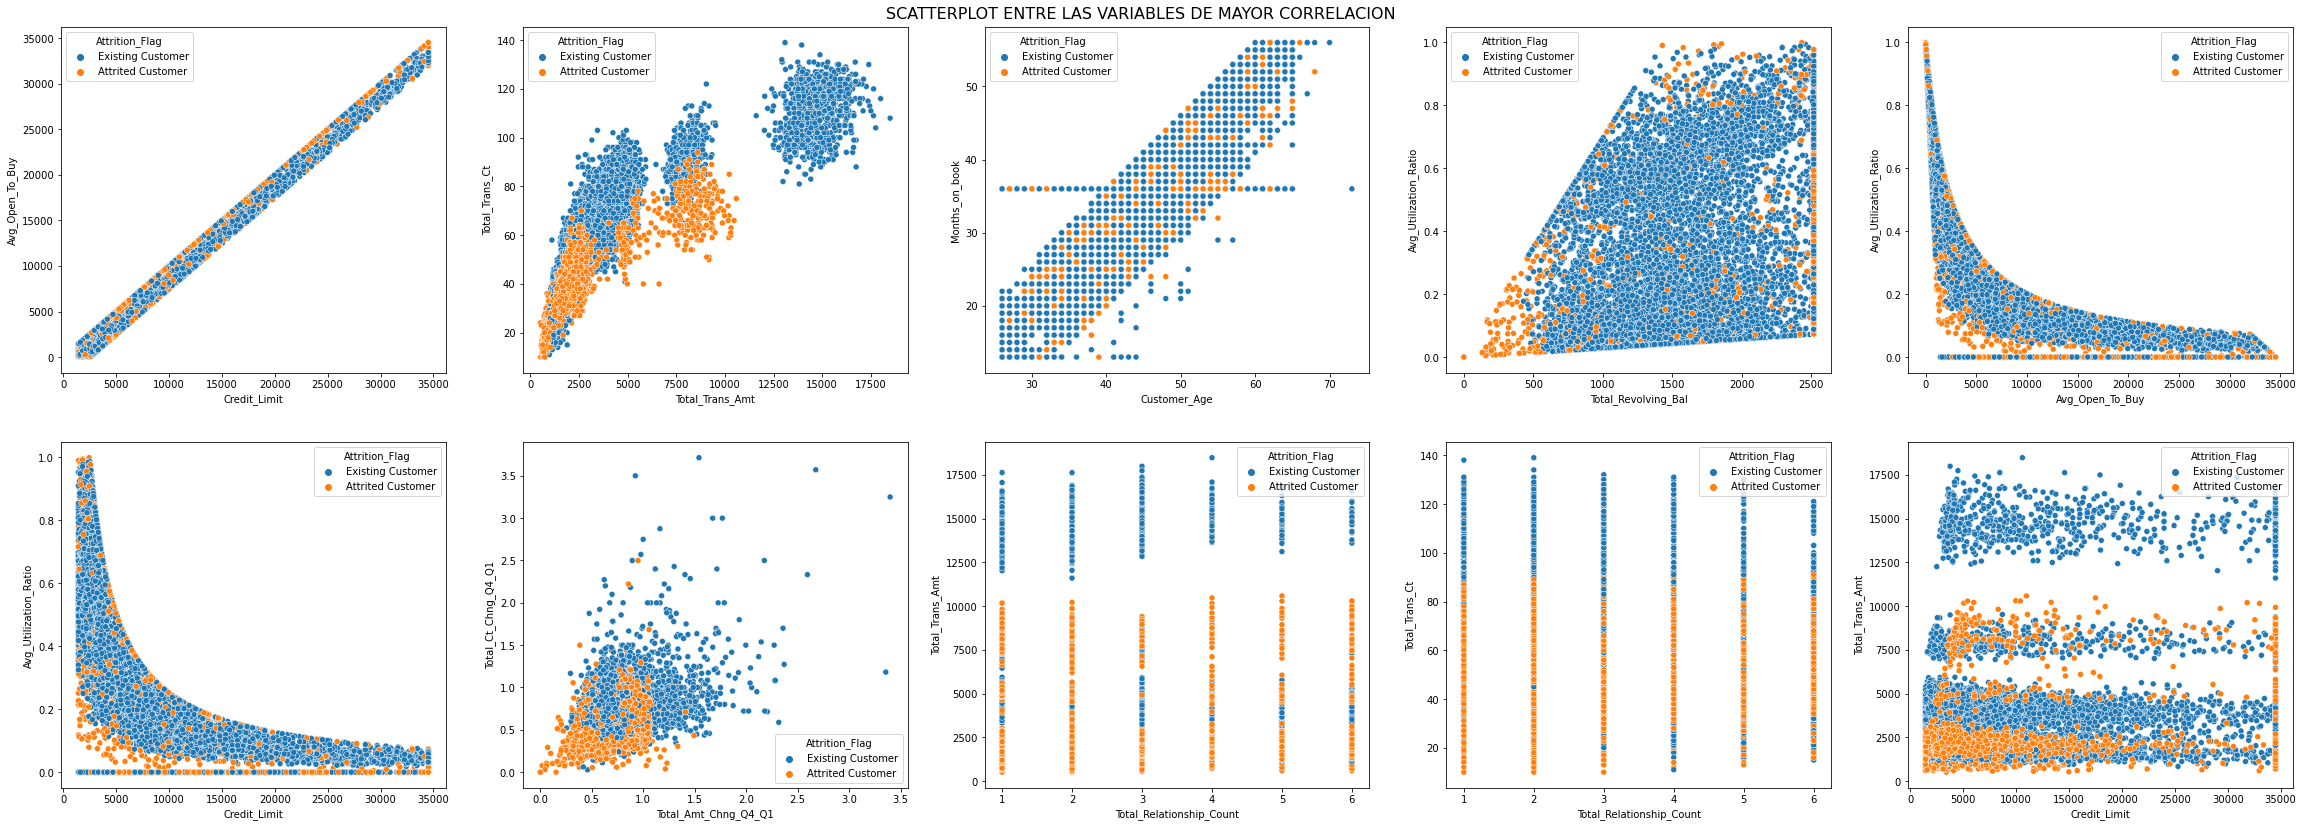

In [6]:
fig , axes = plt.subplots(2,5,figsize = (40,14))
plt.suptitle('SCATTERPLOT ENTRE LAS VARIABLES DE MAYOR CORRELACION',fontsize=16,y = 0.9)

i = 0
for fil in range(2):
  for col in range(5):
        sns.scatterplot(data=bank_df,
                      ax=axes[fil,col],
                      x=df2.index[i][0], 
                      y=df2.index[i][1],
                      hue ="Attrition_Flag"
                      )
        i = i + 1
plt.show()

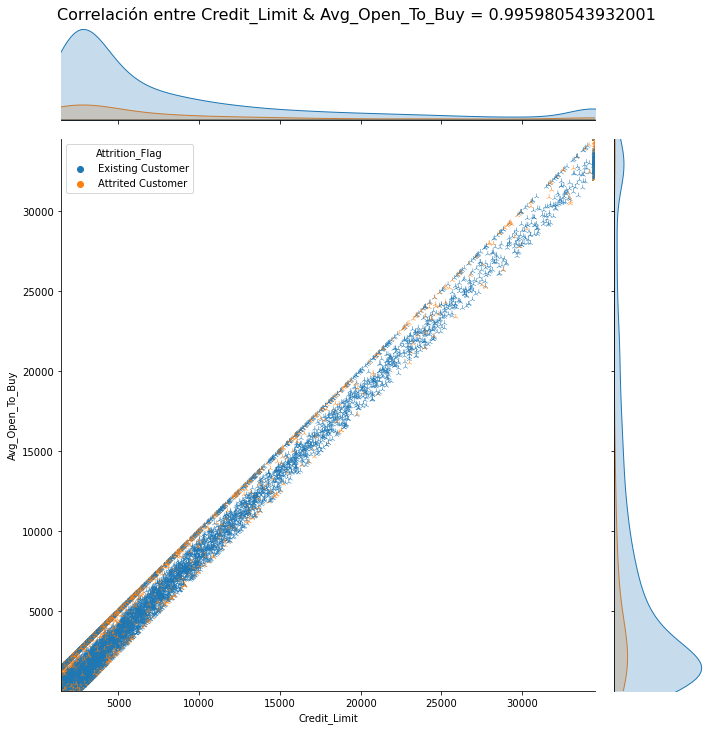

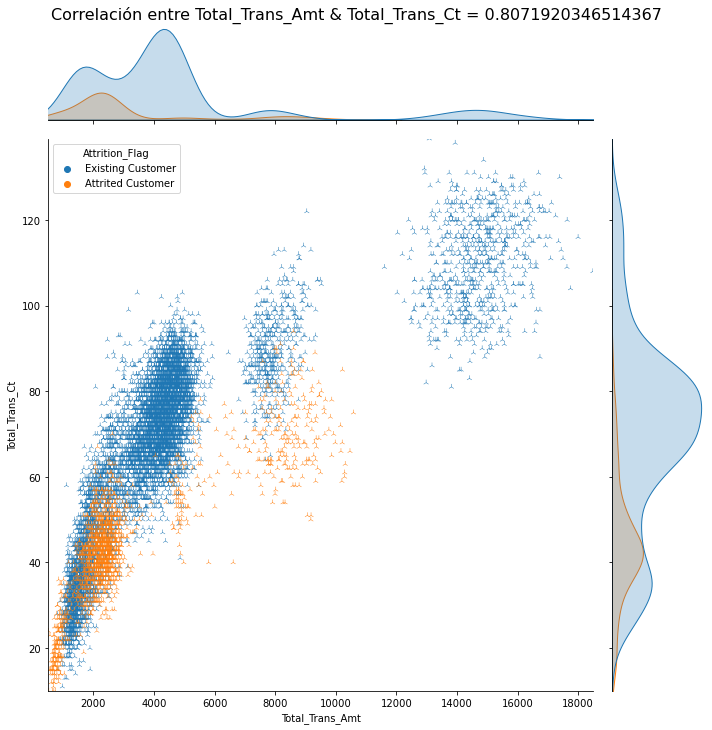

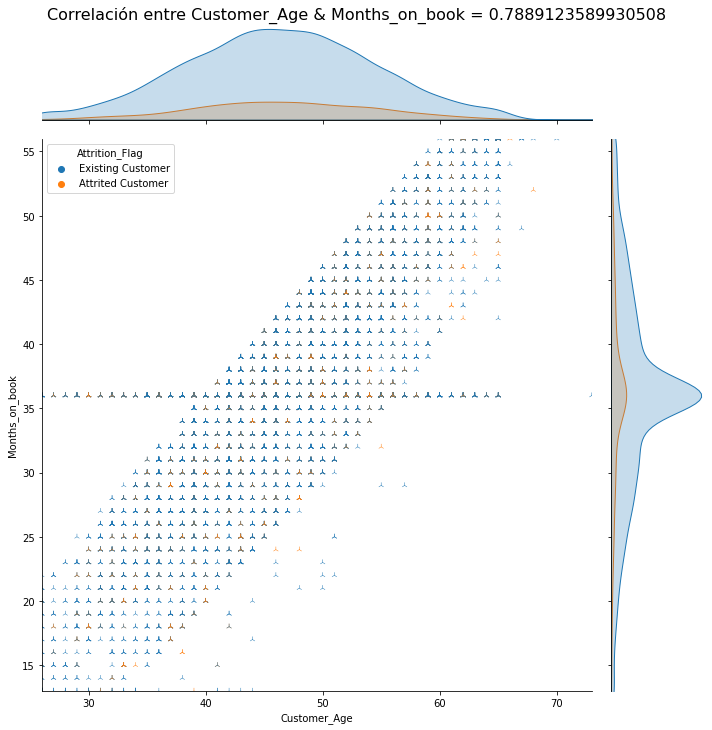

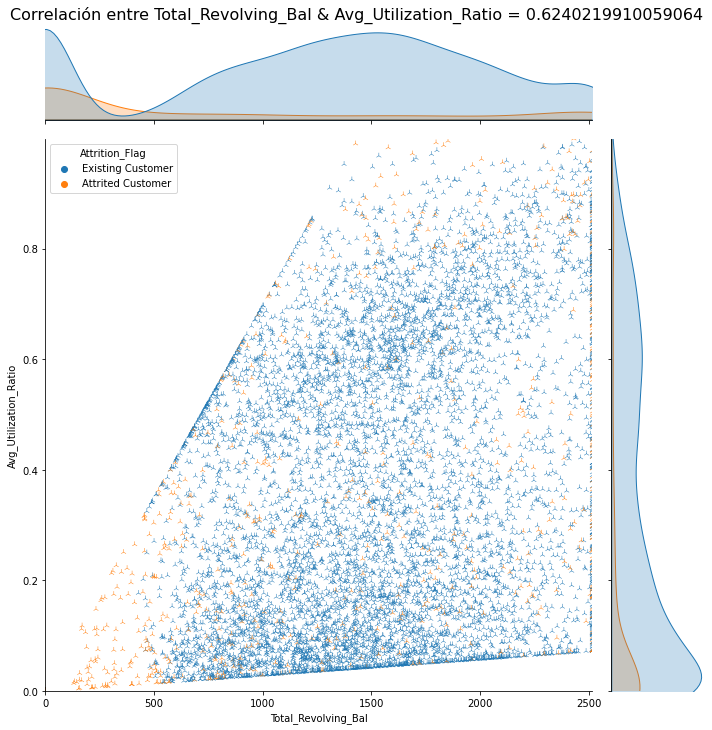

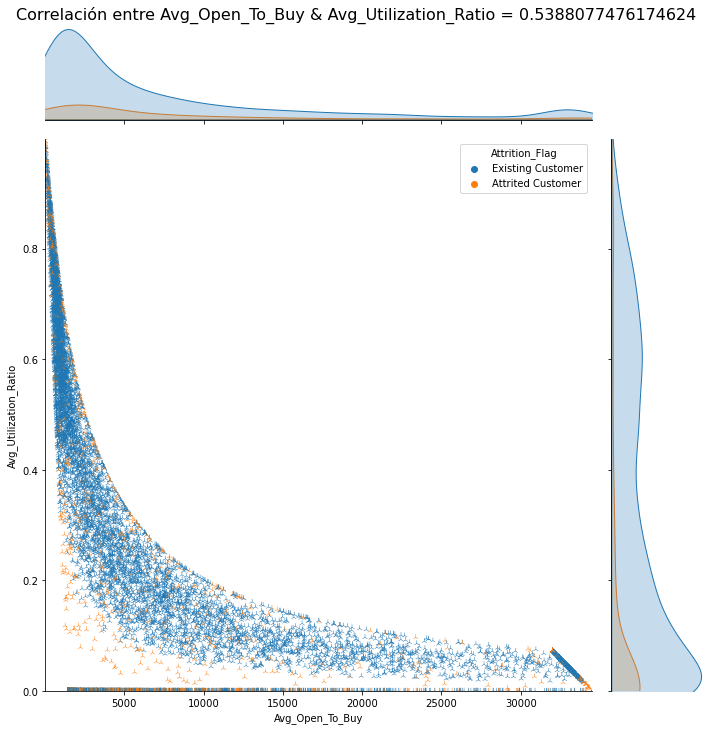

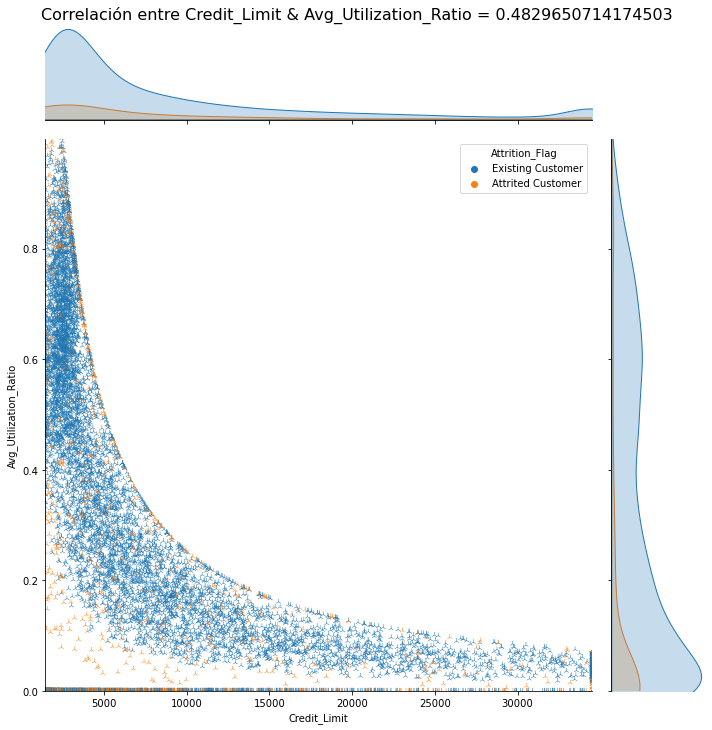

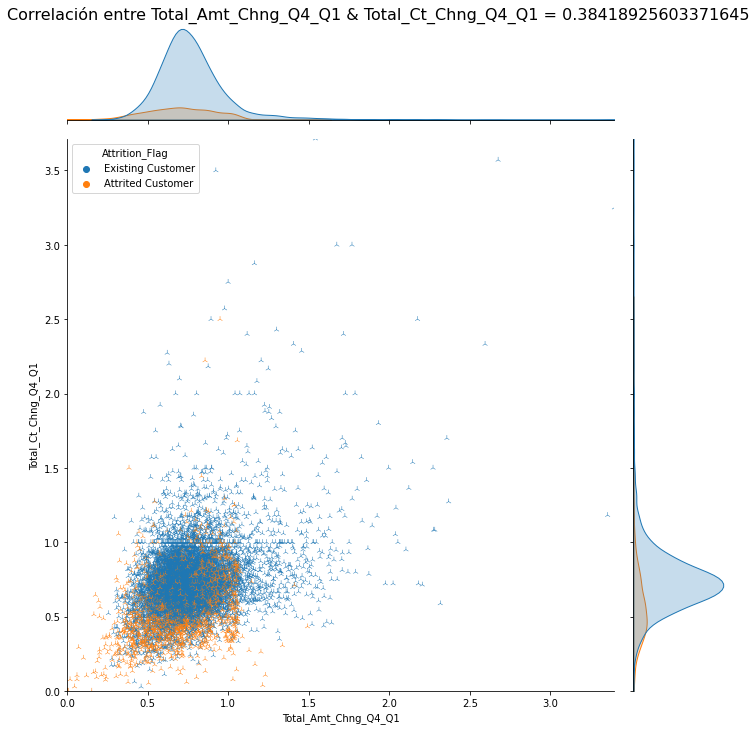

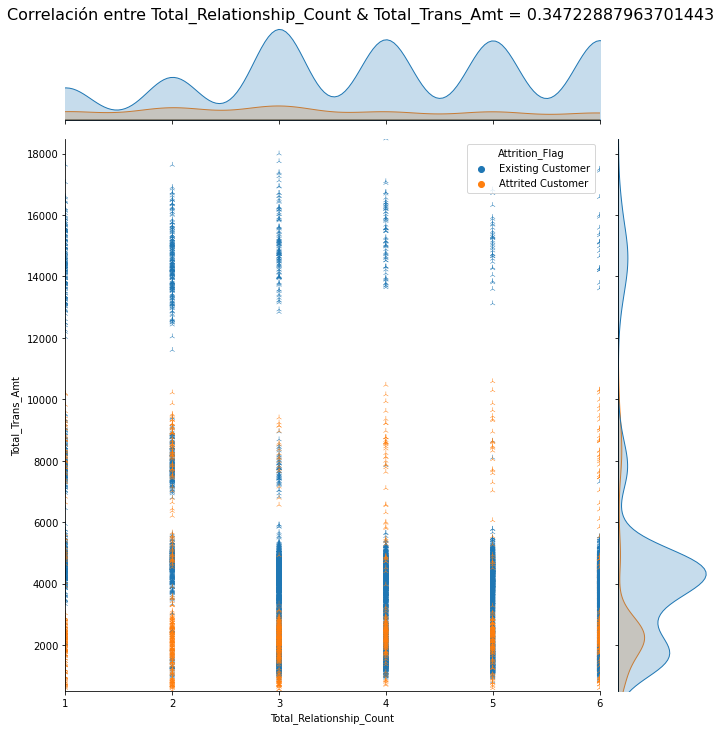

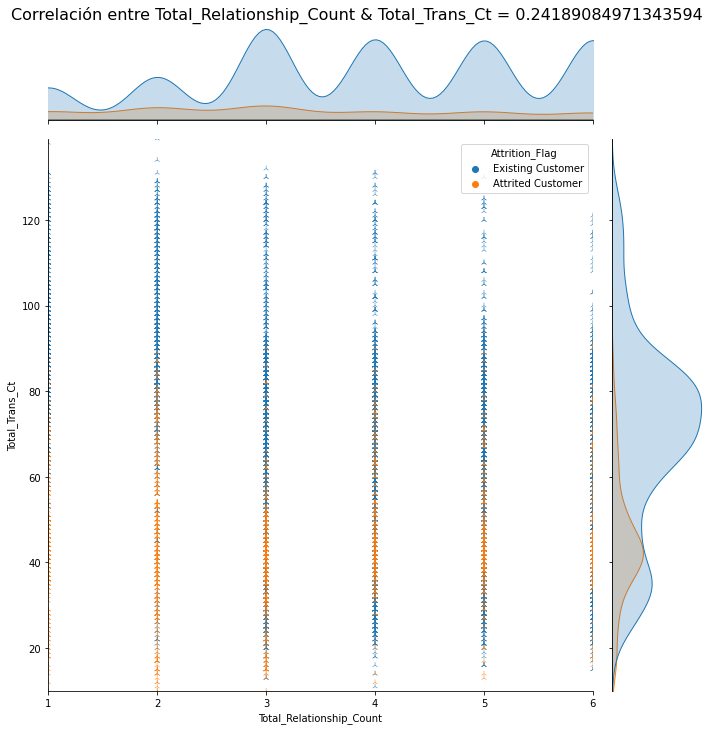

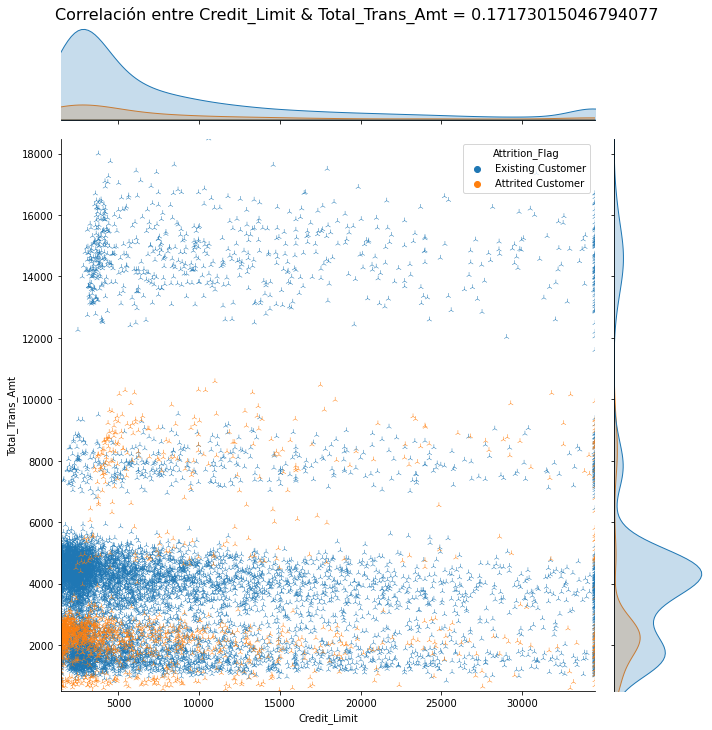

In [29]:
i = 0
for fil in range(2):
  for col in range(5):
    titulo = f"Correlación entre {df2.index[i][0]} & {df2.index[i][1]} = {df2[i]}"
    sns.jointplot(data=bank_df,
                    x=df2.index[i][0], 
                    y=df2.index[i][1],
                    hue ="Attrition_Flag",
                    kind="scatter",
                    marker = '2',
                    height= 10,
                    ratio = 5,
                    xlim = (bank_df[df2.index[i][0]].min(),bank_df[df2.index[i][0]].max()),
                    ylim = (bank_df[df2.index[i][1]].min(),bank_df[df2.index[i][1]].max())
                    )
    plt.suptitle(titulo,fontsize=16,y = 1.01)
    plt.show()
    i = i + 1

Tenemos algunas relaciones lineales mas fuertes entre algunas variables como 

- Credit_Limit / Avg_Open_To_Buy = 0.995981

- Total_Trans_Amt / Total_Trans_Ct = 0.807192

- Customer_Age / Months_on_book = 0.788912

- Total_Revolving_Bal / Avg_Utilization_Ratio = 0.624022

Por otro lado, tenemos otras variables que tienen la siguiente relacion lineal:

- Avg_Open_To_Buy / Avg_Utilization_Ratio = 0.538807

- Credit_Limit / Avg_Utilization_Ratio = 0.482965

La misma NO es muy elevada. Pero observando los graficos anteriores, podemos notar un comportamiento logaritmico. 
